## **Prediction the future price of ETH using Linear Regression & Machine Learning**
---
Conditions:
*   https://en.wikipedia.org/wiki/Linear_regression
*   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split
*   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression

### 1. Libraries

In [1]:
#Import the libraries
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### 2. Download the data from yahoofinance or CSV file

In [2]:
# a) Load the data from csv file
#from google.colab import files
#files.upload()

In [3]:
# b) Load the data from yahoofinance
df = yf.download("ETH-USD", start="2019-08-12", end="2021-05-11", interval = '1d')
#Set the data as the index
df.index.name = None
df['Date'] = df.index
#Show the data
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
2019-08-11,206.732239,216.598648,206.510803,216.092865,216.092865,6440605605,2019-08-11
2019-08-12,216.055908,216.142563,210.946487,211.288071,211.288071,5674315559,2019-08-12
2019-08-13,211.342697,211.384415,205.422501,208.709045,208.709045,5946313205,2019-08-13
2019-08-14,208.603989,209.066437,186.331924,186.607742,186.607742,7444456154,2019-08-14
2019-08-15,186.683502,189.462158,178.142563,188.502060,188.502060,8197244441,2019-08-15


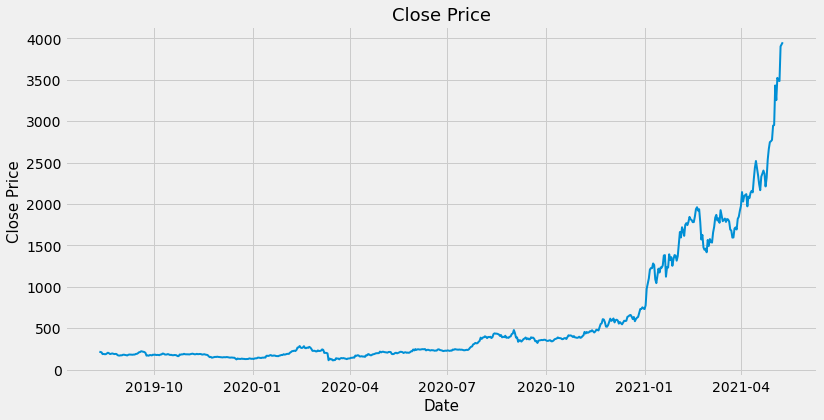

In [4]:
#Visually show and plot the close price
plt.figure(figsize=(12,6))
plt.title('Close Price', fontsize=18)
plt.plot(df['Close'],linewidth=2)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price', fontsize=15)
plt.show()

### 3. Linear Regression

In [5]:
#Create a variable for predicting 'n' days into the future
projection = 14 #looking into 14 days into the future
#Create another column for the data set
df['Prediction'] = df[['Close']].shift(-projection)
#Print the new values
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date,Prediction
2019-08-11,206.732239,216.598648,206.510803,216.092865,216.092865,6440605605,2019-08-11,186.842392
2019-08-12,216.055908,216.142563,210.946487,211.288071,211.288071,5674315559,2019-08-12,188.929382
2019-08-13,211.342697,211.384415,205.422501,208.709045,208.709045,5946313205,2019-08-13,187.516663
2019-08-14,208.603989,209.066437,186.331924,186.607742,186.607742,7444456154,2019-08-14,173.889969
2019-08-15,186.683502,189.462158,178.142563,188.502060,188.502060,8197244441,2019-08-15,169.516739


In [6]:
#Create the independent data set (x)
#Convert the dataframe to an array
X = np.array(df[['Close']])
#Remove the last 14 rows of data from 'Close'
X = X[: -projection]
#print(X)

In [7]:
#Create the dependent data set (y)
y = df['Prediction'].values
#Remove the last 14 rows of data
y = y[: -projection]
#print(y)

In [8]:
#Split the data into 85% training and 15% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [9]:
#Create and train the Linear Regression Model
linReg = LinearRegression()
#Train the model
linReg.fit(x_train, y_train)

LinearRegression()

In [10]:
#Test the model using score
linReg_confidence = linReg.score(x_test, y_test)
#The highest possible score = 1
print('Linear Regression Confidence: ', linReg_confidence)

Linear Regression Confidence:  0.9288585354363975


In [11]:
#Create and set x_projection equal to the last 14 rows of the original data set
x_projection = np.array(df[['Close']])[-projection:]
#print(x_projection)

In [12]:
#Print the linear regression models prediction for the next 14 days
linReg_prediction = linReg.predict(x_projection)
df_linReg_prediction = pd.DataFrame(linReg_prediction, columns=['Prediction'])
df_linReg_prediction.head()

,Prediction
0,3117.959133
1,3216.508239
2,3228.894687
3,3248.164479
4,3451.936882


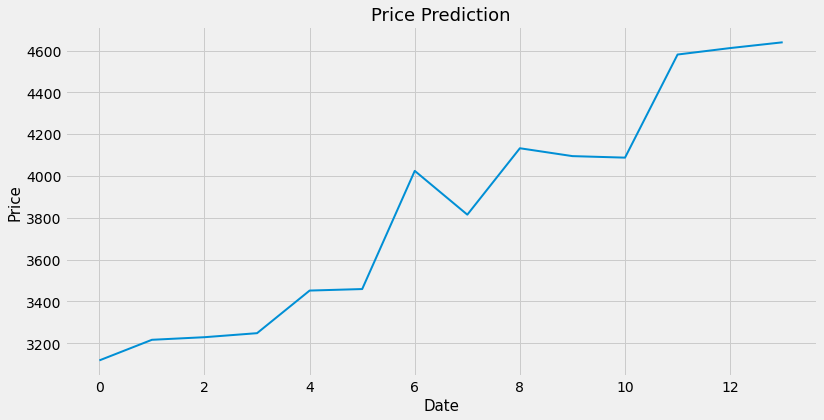

In [13]:
#Visually show and plot the SMA with Close price
df_linReg_prediction['Prediction'].plot(figsize=(12,6), linewidth=2)
plt.title('Price Prediction', fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()